In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import norm, skew #for some statistics
from wordcloud import WordCloud
%matplotlib inline

In [2]:
data = pd.read_csv('movie_metadata.csv')

In [3]:
data.describe()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
count,4993.000000,5028.000000,4939.000000,5020.000000,5036.000000,4.159000e+03,5.043000e+03,5043.000000,5030.000000,5022.000000,4.551000e+03,4935.000000,5030.000000,5043.000000,4714.000000,5043.000000
mean,140.194272,107.201074,686.509212,645.009761,6560.047061,4.846841e+07,8.366816e+04,9699.063851,1.371173,272.770808,3.975262e+07,2002.470517,1651.754473,6.442138,2.220403,7525.964505
std,121.601675,25.197441,2813.328607,1665.041728,15020.759120,6.845299e+07,1.384853e+05,18163.799124,2.013576,377.982886,2.061149e+08,12.474599,4042.438863,1.125116,1.385113,19320.445110
min,1.000000,7.000000,0.000000,0.000000,0.000000,1.620000e+02,5.000000e+00,0.000000,0.000000,1.000000,2.180000e+02,1916.000000,0.000000,1.600000,1.180000,0.000000
25%,50.000000,93.000000,7.000000,133.000000,614.000000,5.340988e+06,8.593500e+03,1411.000000,0.000000,65.000000,6.000000e+06,1999.000000,281.000000,5.800000,1.850000,0.000000
50%,110.000000,103.000000,49.000000,371.500000,988.000000,2.551750e+07,3.435900e+04,3090.000000,1.000000,156.000000,2.000000e+07,2005.000000,595.000000,6.600000,2.350000,166.000000
75%,195.000000,118.000000,194.500000,636.000000,11000.000000,6.230944e+07,9.630900e+04,13756.500000,2.000000,326.000000,4.500000e+07,2011.000000,918.000000,7.200000,2.350000,3000.000000
max,813.000000,511.000000,23000.000000,23000.000000,640000.000000,7.605058e+08,1.689764e+06,656730.000000,43.000000,5060.000000,1.221550e+10,2016.000000,137000.000000,9.500000,16.000000,349000.000000


In [4]:
data.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


In [5]:
data.columns

Index(['color', 'director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name',
       'movie_title', 'num_voted_users', 'cast_total_facebook_likes',
       'actor_3_name', 'facenumber_in_poster', 'plot_keywords',
       'movie_imdb_link', 'num_user_for_reviews', 'language', 'country',
       'content_rating', 'budget', 'title_year', 'actor_2_facebook_likes',
       'imdb_score', 'aspect_ratio', 'movie_facebook_likes'],
      dtype='object')

# 缺失值处理

## 非缺失值和异常值的单元格

In [6]:
data_ = data.copy()

In [7]:
data.shape

(5043, 28)

In [8]:
data.count()

color                        5024
director_name                4939
num_critic_for_reviews       4993
duration                     5028
director_facebook_likes      4939
actor_3_facebook_likes       5020
actor_2_name                 5030
actor_1_facebook_likes       5036
gross                        4159
genres                       5043
actor_1_name                 5036
movie_title                  5043
num_voted_users              5043
cast_total_facebook_likes    5043
actor_3_name                 5020
facenumber_in_poster         5030
plot_keywords                4890
movie_imdb_link              5043
num_user_for_reviews         5022
language                     5031
country                      5038
content_rating               4740
budget                       4551
title_year                   4935
actor_2_facebook_likes       5030
imdb_score                   5043
aspect_ratio                 4714
movie_facebook_likes         5043
dtype: int64

In [9]:
data_.isnull().any()

color                         True
director_name                 True
num_critic_for_reviews        True
duration                      True
director_facebook_likes       True
actor_3_facebook_likes        True
actor_2_name                  True
actor_1_facebook_likes        True
gross                         True
genres                       False
actor_1_name                  True
movie_title                  False
num_voted_users              False
cast_total_facebook_likes    False
actor_3_name                  True
facenumber_in_poster          True
plot_keywords                 True
movie_imdb_link              False
num_user_for_reviews          True
language                      True
country                       True
content_rating                True
budget                        True
title_year                    True
actor_2_facebook_likes        True
imdb_score                   False
aspect_ratio                  True
movie_facebook_likes         False
dtype: bool

In [10]:
data_.isnull().replace({True:1,False:0}).sum()

color                         19
director_name                104
num_critic_for_reviews        50
duration                      15
director_facebook_likes      104
actor_3_facebook_likes        23
actor_2_name                  13
actor_1_facebook_likes         7
gross                        884
genres                         0
actor_1_name                   7
movie_title                    0
num_voted_users                0
cast_total_facebook_likes      0
actor_3_name                  23
facenumber_in_poster          13
plot_keywords                153
movie_imdb_link                0
num_user_for_reviews          21
language                      12
country                        5
content_rating               303
budget                       492
title_year                   108
actor_2_facebook_likes        13
imdb_score                     0
aspect_ratio                 329
movie_facebook_likes           0
dtype: int64

In [11]:
data_ = data_.drop(np.where(np.isnan(data_.duration))[0], axis=0)  # 电影时长缺失的删去

In [12]:
data_.shape

(5028, 28)

In [13]:
data_ = data_.reset_index(drop=True) # 重新索引

In [14]:
data_ = data_.drop(np.where(np.isnan(data_.title_year))[0], axis=0)  # 电影年份缺失的删去
data_ = data_.reset_index(drop=True)  # 重新索引
data_.shape

(4923, 28)

In [15]:
data_ = data_.drop(np.where(np.isnan(data_.gross))[0], axis=0)  # 电影票房缺失的删去
data_ = data_.reset_index(drop=True)  # 重新索引
data_.shape

(4154, 28)

In [16]:
data_.isnull().replace({True:1,False:0}).sum()

color                          2
director_name                  0
num_critic_for_reviews         3
duration                       0
director_facebook_likes        0
actor_3_facebook_likes        13
actor_2_name                   6
actor_1_facebook_likes         4
gross                          0
genres                         0
actor_1_name                   4
movie_title                    0
num_voted_users                0
cast_total_facebook_likes      0
actor_3_name                  13
facenumber_in_poster           7
plot_keywords                 39
movie_imdb_link                0
num_user_for_reviews           1
language                       3
country                        0
content_rating                63
budget                       264
title_year                     0
actor_2_facebook_likes         6
imdb_score                     0
aspect_ratio                 104
movie_facebook_likes           0
dtype: int64

In [17]:
data_[['actor_2_name',
      'actor_1_name',
      'actor_3_name',
      'plot_keywords',
      'language',
      'country',
      'content_rating',
      ]] = data_[[
      'actor_2_name',
      'actor_1_name',
      'actor_3_name',
      'plot_keywords',
      'language',
      'country',
      'content_rating',
      ]].fillna('Other')   # 填充Other

In [18]:
data_[['num_critic_for_reviews',
      'actor_3_facebook_likes',
      'actor_1_facebook_likes',
      'facenumber_in_poster',
      'num_user_for_reviews',
      'actor_2_facebook_likes',
      'aspect_ratio']] = data_[['num_critic_for_reviews',
      'actor_3_facebook_likes',
      'actor_1_facebook_likes',
      'facenumber_in_poster',
      'num_user_for_reviews',
      'actor_2_facebook_likes',
      'aspect_ratio']].fillna(0)  # 填充0

In [19]:
data_.budget = data_.budget.mean()  # 成本填充均值

In [20]:
data_ = data_.drop(['aspect_ratio','color','movie_imdb_link'], axis=1) # 删掉没有意义的几列

In [21]:
data_.isnull().any()

director_name                False
num_critic_for_reviews       False
duration                     False
director_facebook_likes      False
actor_3_facebook_likes       False
actor_2_name                 False
actor_1_facebook_likes       False
gross                        False
genres                       False
actor_1_name                 False
movie_title                  False
num_voted_users              False
cast_total_facebook_likes    False
actor_3_name                 False
facenumber_in_poster         False
plot_keywords                False
num_user_for_reviews         False
language                     False
country                      False
content_rating               False
budget                       False
title_year                   False
actor_2_facebook_likes       False
imdb_score                   False
movie_facebook_likes         False
dtype: bool

In [22]:
data_ = data_.drop_duplicates()

In [23]:
data_.shape

(4119, 25)

In [24]:
data_['movie_title'].head(10)

0                                      Avatar 
1    Pirates of the Caribbean: At World's End 
2                                     Spectre 
3                       The Dark Knight Rises 
4                                 John Carter 
5                                Spider-Man 3 
6                                     Tangled 
7                     Avengers: Age of Ultron 
8      Harry Potter and the Half-Blood Prince 
9          Batman v Superman: Dawn of Justice 
Name: movie_title, dtype: object

In [25]:
data_.to_csv('未缺失数据.csv')

# 数据分析

In [2]:
f = open('未缺失数据.csv')
data_ = pd.read_csv(f, index_col=0)

In [3]:
data_.head()

,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,...,plot_keywords,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,movie_facebook_likes
0,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,...,avatar|future|marine|native|paraplegic,3054.0,English,USA,PG-13,4.520391e+07,2009.0,936.0,7.9,33000
1,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,...,goddess|marriage ceremony|marriage proposal|pi...,1238.0,English,USA,PG-13,4.520391e+07,2007.0,5000.0,7.1,0
2,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,Christoph Waltz,...,bomb|espionage|sequel|spy|terrorist,994.0,English,UK,PG-13,4.520391e+07,2015.0,393.0,6.8,85000
3,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,Tom Hardy,...,deception|imprisonment|lawlessness|police offi...,2701.0,English,USA,PG-13,4.520391e+07,2012.0,23000.0,8.5,164000
4,Andrew Stanton,462.0,132.0,475.0,530.0,Samantha Morton,640.0,73058679.0,Action|Adventure|Sci-Fi,Daryl Sabara,...,alien|american civil war|male nipple|mars|prin...,738.0,English,USA,PG-13,4.520391e+07,2012.0,632.0,6.6,24000


In [4]:
data_.movie_title = data_.movie_title.apply(lambda x:x[:-1])

In [5]:
data_.movie_title.head()

0                                      Avatar
1    Pirates of the Caribbean: At World's End
2                                     Spectre
3                       The Dark Knight Rises
4                                 John Carter
Name: movie_title, dtype: object

## 导演名字的频率

In [6]:
data_.director_name.value_counts()

Steven Spielberg      25
Woody Allen           19
Clint Eastwood        19
Martin Scorsese       18
Ridley Scott          17
Steven Soderbergh     16
Tim Burton            16
Renny Harlin          15
Spike Lee             15
Robert Zemeckis       13
Oliver Stone          13
Ron Howard            13
Joel Schumacher       13
Robert Rodriguez      13
Michael Bay           13
Barry Levinson        13
Sam Raimi             12
John Carpenter        12
Tony Scott            12
Peter Jackson         12
Rob Reiner            11
Richard Linklater     11
Wes Craven            11
Shawn Levy            11
Chris Columbus        11
Rob Cohen             10
Kevin Smith           10
John McTiernan        10
David Fincher         10
Bobby Farrelly        10
                      ..
Mary Harron            1
Richard E. Grant       1
Jez Butterworth        1
Arjun Sablok           1
Robert Stromberg       1
Jeannot Szwarc         1
Michael Pressman       1
Feroz Abbas Khan       1
Christopher Erskin     1


## 分组查看导演的名字的facebook_likes

In [7]:
director_facebook_group = data_.director_facebook_likes.groupby(data_.director_name)

In [8]:
director_facebook_group.mean().sort_values(ascending=False).head(20)

director_name
Joseph Gordon-Levitt    23000.0
Christopher Nolan       22000.0
David Fincher           21000.0
Denzel Washington       18000.0
Kevin Spacey            18000.0
Martin Scorsese         17000.0
Clint Eastwood          16000.0
Quentin Tarantino       16000.0
Tom Hanks               15000.0
Steven Spielberg        14000.0
J.J. Abrams             14000.0
Sylvester Stallone      13000.0
Alfred Hitchcock        13000.0
Tim Burton              13000.0
Tony Scott              12000.0
Leonard Nimoy           12000.0
Steve Buscemi           12000.0
Harold Ramis            11000.0
Woody Allen             11000.0
Angelina Jolie Pitt     11000.0
Name: director_facebook_likes, dtype: float64

## 主演1名字的频率

In [9]:
data_.actor_1_name.value_counts().head(10)

Robert De Niro       42
Johnny Depp          39
J.K. Simmons         31
Matt Damon           30
Denzel Washington    30
Nicolas Cage         30
Bruce Willis         29
Robin Williams       27
Liam Neeson          27
Robert Downey Jr.    26
Name: actor_1_name, dtype: int64

## 主演2名字的频率

In [10]:
data_.actor_2_name.value_counts().head(10)

Morgan Freeman         20
Charlize Theron        15
Brad Pitt              13
James Franco           11
Meryl Streep           10
Robert Duvall           9
Bruce Willis            9
Angelina Jolie Pitt     9
Will Ferrell            9
Adam Sandler            9
Name: actor_2_name, dtype: int64

## 地域性分析

In [11]:
country = data_.groupby('country').size()

In [12]:
country.sort_values(ascending=False).head(10)

country
USA          3207
UK            359
France        120
Germany        87
Canada         72
Australia      42
Spain          26
India          23
China          17
Japan          17
dtype: int64

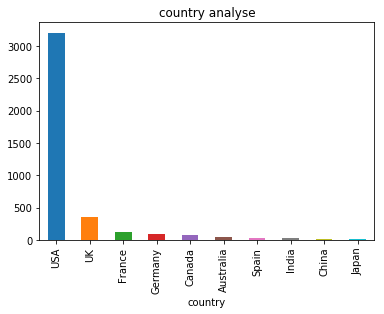

In [13]:
country.sort_values(ascending=False).head(10).plot(kind='bar',title='country analyse')

## 电影评分

In [14]:
data_['imdb_score'].sort_values(ascending=False).head(15)

1840    9.3
3166    9.2
65      9.0
2641    9.0
1780    8.9
329     8.9
3078    8.9
3852    8.9
95      8.8
660     8.8
261     8.8
806     8.8
1942    8.8
4009    8.7
1806    8.7
Name: imdb_score, dtype: float64

In [15]:
movie_max1=data_.sort_values(['imdb_score'],ascending=False).head(200)

movie_max1[['movie_title','imdb_score','movie_facebook_likes']].head(10)

,movie_title,imdb_score,movie_facebook_likes
1840,The Shawshank Redemption,9.3,108000
3166,The Godfather,9.2,43000
65,The Dark Knight,9.0,37000
2641,The Godfather: Part II,9.0,14000
3852,"The Good, the Bad and the Ugly",8.9,20000
1780,Schindler's List,8.9,41000
3078,Pulp Fiction,8.9,45000
329,The Lord of the Rings: The Return of the King,8.9,16000
660,Fight Club,8.8,48000
806,Forrest Gump,8.8,59000


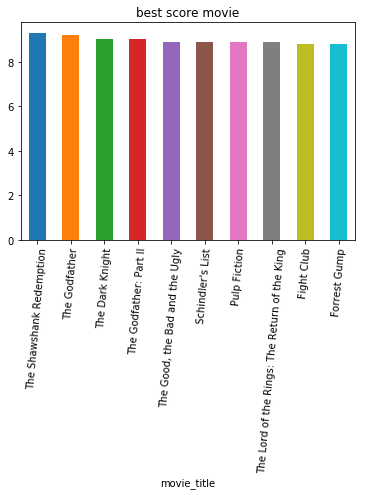

In [16]:
movie_max_series=pd.Series(movie_max1['imdb_score'].head(10).values,index = movie_max1['movie_title'].head(10))

movie_max_series.plot(kind='bar',title='best score movie', rot=85)

## 电影的facebook_likes

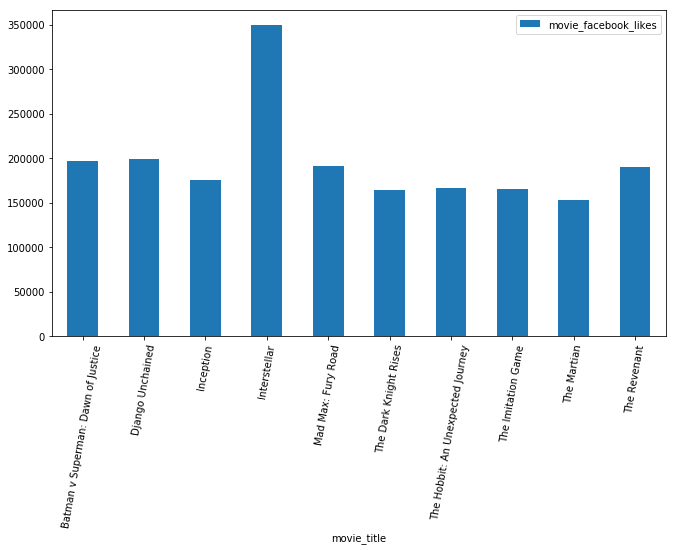

In [17]:
sorted_fl=data_.sort_values(by="movie_facebook_likes",ascending=False)
top10fl=sorted_fl.head(10)
top10fl[['movie_facebook_likes']].groupby(top10fl['movie_title']).sum().plot.bar(stacked=True,
                                                                                 figsize=(11,6),
                                                                                 rot=80)
plt.legend()

In [18]:
sorted_fl.head(15)[['movie_title','gross','movie_facebook_likes','imdb_score']]

,movie_title,gross,movie_facebook_likes,imdb_score
94,Interstellar,187991439.0,349000,8.6
286,Django Unchained,162804648.0,199000,8.5
9,Batman v Superman: Dawn of Justice,330249062.0,197000,6.9
125,Mad Max: Fury Road,153629485.0,191000,8.1
175,The Revenant,183635922.0,190000,8.1
95,Inception,292568851.0,175000,8.8
96,The Hobbit: An Unexpected Journey,303001229.0,166000,7.9
2443,The Imitation Game,91121452.0,165000,8.1
3,The Dark Knight Rises,448130642.0,164000,8.5
269,The Martian,228430993.0,153000,8.1


## 电影数量

In [19]:
grouped_year= data_.groupby('title_year').size()

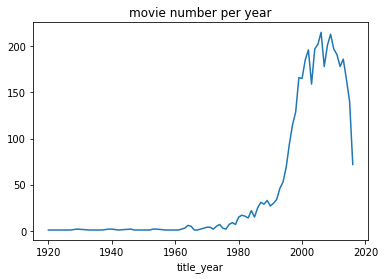

In [20]:
grouped_year.plot(title='movie number per year')

## 票房

Text(0.5,1,'gross of movie')

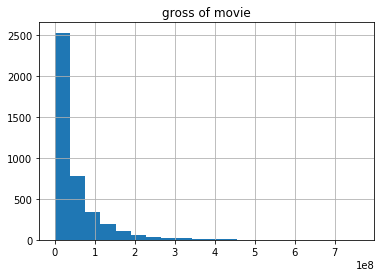

In [21]:
data_.gross.hist(bins=20)
plt.title('gross of movie')

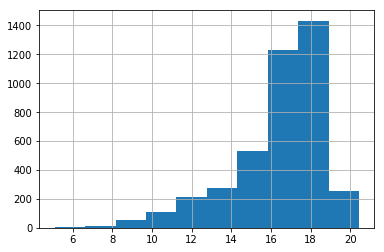

In [22]:
data_.gross.apply(np.log).replace({-np.inf:0}).hist()

## 热门电影情节关键词分析

### facebook_likes most

In [23]:
keywords=sorted_fl["plot_keywords"].head(200)
keywords=pd.Series('/'.join(keywords).lower().split("|"))

In [40]:
def make_cloud(cloud_data):
    cloud_data=cloud_data.str.lower()
    cloud_list=list(cloud_data) 
    unique_string=(" ").join(cloud_list)
    wordcloud = WordCloud(width = 1000, 
                          height = 800,
                          max_words=100, 
                          background_color='white', 
                          font_path=r'C:\Windows\Fonts\Inkfree.ttf').generate(unique_string)
    plt.figure(figsize=(15,8))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()

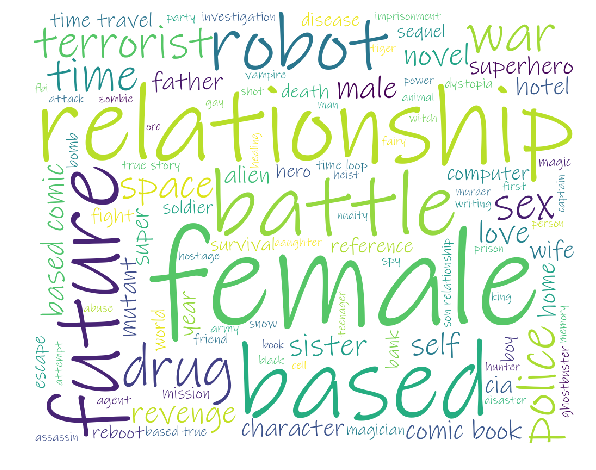

In [41]:
make_cloud(keywords)

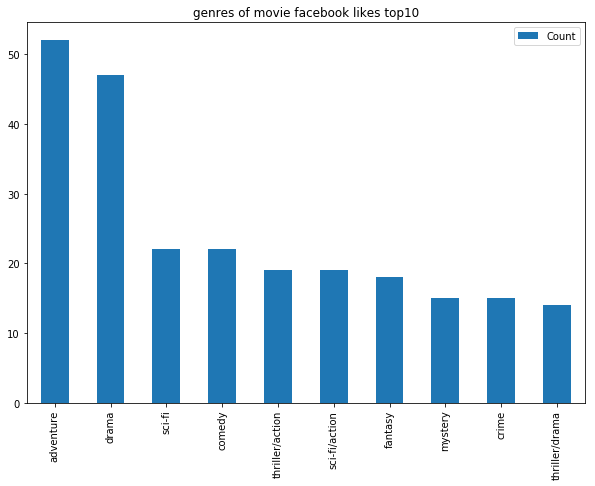

In [63]:
genres=sorted_fl["genres"].head(200)
count=pd.Series('/'.join(genres).lower().split("|")).value_counts()[:10]
count.to_frame('Count').plot(kind='bar',title='genres of movie facebook likes top10', figsize=(10,7))

### imdb score most

In [42]:
keywords=movie_max1["plot_keywords"].head(200)
keywords=pd.Series('/'.join(keywords).lower().split("|"))

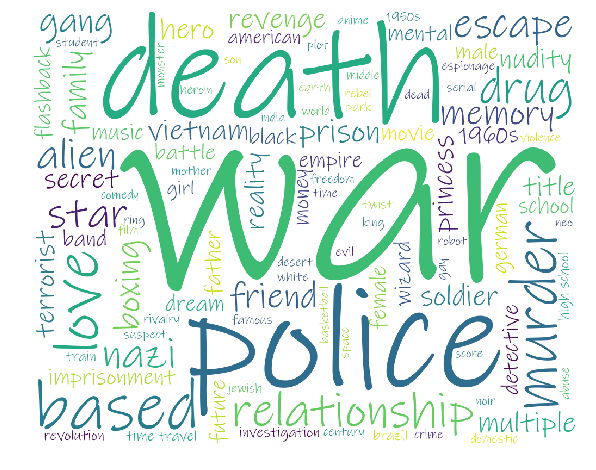

In [43]:
make_cloud(keywords)

## 热门电影评级分析

In [46]:
content=sorted_fl["content_rating"].head(200)  # facebook_likes
count=pd.Series(' '.join(content).lower().split(" ")).value_counts()[:5]
count

pg-13    101
r         81
pg        17
g          1
dtype: int64

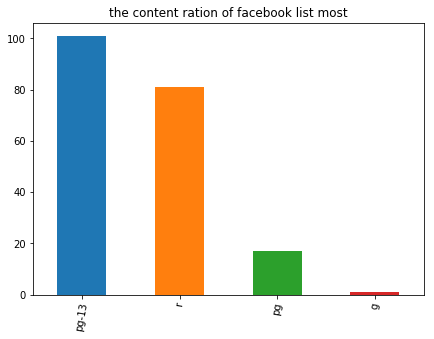

In [49]:
count.plot(kind='bar', figsize=(7,5), rot=80, title='the content ration of facebook list most')

In [50]:
content=movie_max1["content_rating"].head(200)  # imdb score
count=pd.Series(' '.join(content).lower().split(" ")).value_counts()[:5]
count

r        104
pg-13     42
pg        27
g         11
not        9
dtype: int64

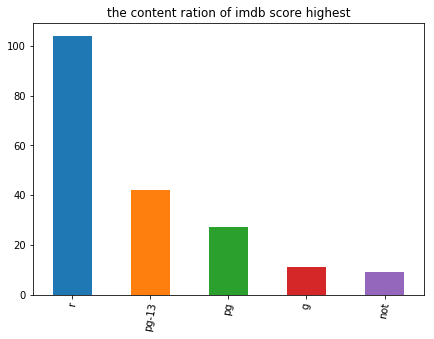

In [51]:
count.plot(kind='bar', figsize=(7,5), rot=80, title='the content ration of imdb score highest')

## Gross（票房）拟合正态分布
+ Skewness（偏差度）很高，全部偏向左边
+ Kurtosis（峰度）高

D:\anaconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
D:\anaconda\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "



 mu = 48525841.47 and sigma = 68465897.57



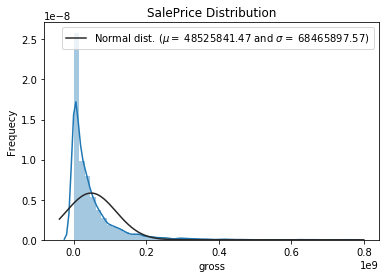

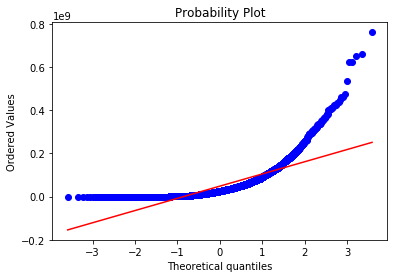

In [35]:
sns.distplot(data_['gross'],fit=norm)

#find fitted parameters
(mu, sigma) = norm.fit(data_['gross'])
print('\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))


plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f})'.format(mu, sigma)],loc='best')
plt.ylabel('Frequecy')
plt.title('SalePrice Distribution')
#plot QQimages(Samplt Quantiles and Theoretical Quantiles)
fig = plt.figure()
res = stats.probplot(data_['gross'],plot=plt)
plt.show()

## 取对数后拟合正态分布
$$ y = \log(1+x) $$

D:\anaconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
D:\anaconda\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "



 mu = 16.39 and sigma = 2.32



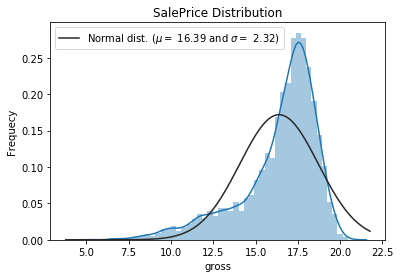

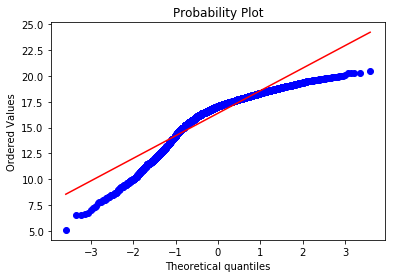

In [49]:
# d = data_['gross'].apply(lambda x:np.log10(1+x))
d = data_['gross'].apply(lambda x:np.log1p(x))
# d = data_['gross'].apply(lambda x:np.sqrt(x))
sns.distplot(d,fit=norm)

#find fitted parameters
(mu, sigma) = norm.fit(d)
print('\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))


plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f})'.format(mu, sigma)],loc='best')
plt.ylabel('Frequecy')
plt.title('SalePrice Distribution')
#plot QQimages(Samplt Quantiles and Theoretical Quantiles)
fig = plt.figure()
res = stats.probplot(d,plot=plt)
plt.show()

## 分析movie_facebook_likes

In [27]:
def plot_norm(d):
    sns.distplot(d,fit=norm)

    #find fitted parameters
    (mu, sigma) = norm.fit(d)
    print('\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))


    plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f})'.format(mu, sigma)],loc='best')
    plt.ylabel('Frequecy')
    plt.title('SalePrice Distribution')
    #plot QQimages(Samplt Quantiles and Theoretical Quantiles)
    fig = plt.figure()
    res = stats.probplot(d,plot=plt)
    plt.show()

In [8]:
data_.columns

Index(['director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name',
       'movie_title', 'num_voted_users', 'cast_total_facebook_likes',
       'actor_3_name', 'facenumber_in_poster', 'plot_keywords',
       'num_user_for_reviews', 'language', 'country', 'content_rating',
       'budget', 'title_year', 'actor_2_facebook_likes', 'imdb_score',
       'movie_facebook_likes'],
      dtype='object')

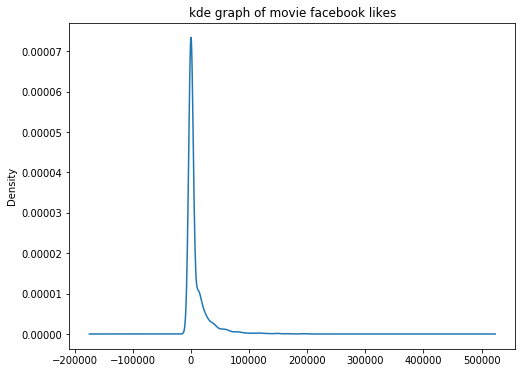

In [17]:
data_.movie_facebook_likes.plot(kind='kde', title='kde graph of movie facebook likes', figsize=(8,6))

D:\anaconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
D:\anaconda\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


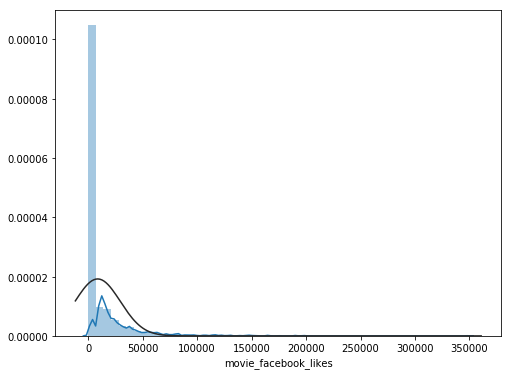

In [24]:
plt.figure(figsize=(8,6))
sns.distplot(data_.movie_facebook_likes,fit=norm)

### 对数转化

D:\anaconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
D:\anaconda\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "



 mu = 4.42 and sigma = 4.34



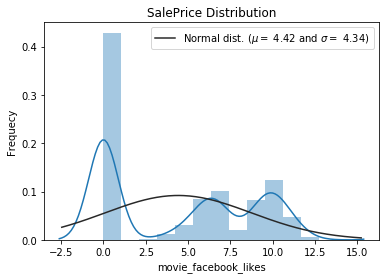

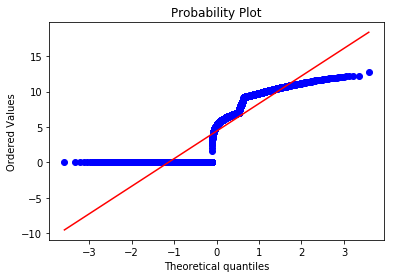

In [32]:
plot_norm(data_.movie_facebook_likes.apply(lambda x:np.log1p(x)))

# 数据处理

In [47]:
data_.head()

,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,...,plot_keywords,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,movie_facebook_likes
0,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,...,avatar|future|marine|native|paraplegic,3054.0,English,USA,PG-13,4.520391e+07,2009.0,936.0,7.9,33000
1,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,...,goddess|marriage ceremony|marriage proposal|pi...,1238.0,English,USA,PG-13,4.520391e+07,2007.0,5000.0,7.1,0
2,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,Christoph Waltz,...,bomb|espionage|sequel|spy|terrorist,994.0,English,UK,PG-13,4.520391e+07,2015.0,393.0,6.8,85000
3,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,Tom Hardy,...,deception|imprisonment|lawlessness|police offi...,2701.0,English,USA,PG-13,4.520391e+07,2012.0,23000.0,8.5,164000
4,Andrew Stanton,462.0,132.0,475.0,530.0,Samantha Morton,640.0,73058679.0,Action|Adventure|Sci-Fi,Daryl Sabara,...,alien|american civil war|male nipple|mars|prin...,738.0,English,USA,PG-13,4.520391e+07,2012.0,632.0,6.6,24000


## 归一化

In [145]:
df_norm2 = data_[['num_critic_for_reviews',
                 'duration',
                 'director_facebook_likes',
                 'actor_3_facebook_likes',
                'actor_1_facebook_likes',
                'gross',
                'num_voted_users',
                'cast_total_facebook_likes',
                 'facenumber_in_poster',
                 'num_user_for_reviews',
                 'budget',
                 'actor_2_facebook_likes',
                 'imdb_score',
                 'movie_facebook_likes']].apply(lambda x: (x - np.mean(x)) / (np.std(x)))

In [146]:
df_norm2.columns

Index(['num_critic_for_reviews', 'duration', 'director_facebook_likes',
       'actor_3_facebook_likes', 'actor_1_facebook_likes', 'gross',
       'num_voted_users', 'cast_total_facebook_likes', 'facenumber_in_poster',
       'num_user_for_reviews', 'budget', 'actor_2_facebook_likes',
       'imdb_score', 'movie_facebook_likes'],
      dtype='object')

In [147]:
data_.columns

Index(['director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name',
       'movie_title', 'num_voted_users', 'cast_total_facebook_likes',
       'actor_3_name', 'facenumber_in_poster', 'plot_keywords',
       'num_user_for_reviews', 'language', 'country', 'content_rating',
       'budget', 'title_year', 'actor_2_facebook_likes', 'imdb_score',
       'movie_facebook_likes'],
      dtype='object')

In [148]:
df_norm2.insert(0,'year',data_.title_year.astype('int'))

## One-Hot编码

In [4]:
one_hot = pd.get_dummies(data_[['language','country','content_rating']])

In [59]:
one_hot

,language_Aboriginal,language_Arabic,language_Aramaic,language_Bosnian,language_Cantonese,language_Chinese,language_Czech,language_Danish,language_Dari,language_Dutch,...,content_rating_M,content_rating_NC-17,content_rating_Not Rated,content_rating_Other,content_rating_PG,content_rating_PG-13,content_rating_Passed,content_rating_R,content_rating_Unrated,content_rating_X
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


# 分析相关性

In [176]:
cor = data_.corr(method='pearson')
cor.style.background_gradient()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,movie_facebook_likes
num_critic_for_reviews,1,0.238761,0.180428,0.25231,0.180701,0.409109,0.602974,0.249057,-0.0341877,0.577308,4.61645e-15,0.373041,0.260616,0.334103,0.697739
duration,0.238761,1,0.180596,0.124683,0.0897988,0.216158,0.343261,0.124991,0.0323609,0.356219,-1.73654e-14,-0.125424,0.131499,0.351751,0.218184
director_facebook_likes,0.180428,0.180596,1,0.124202,0.0927879,0.114239,0.304919,0.123134,-0.0461133,0.223839,-3.548e-15,-0.0517719,0.121449,0.18601,0.163491
actor_3_facebook_likes,0.25231,0.124683,0.124202,1,0.255544,0.186789,0.266812,0.48629,0.102671,0.211349,4.25511e-15,0.103637,0.552057,0.0573029,0.26204
actor_1_facebook_likes,0.180701,0.0897988,0.0927879,0.255544,1,0.147935,0.188807,0.94697,0.0636023,0.13505,8.1534e-17,0.0851478,0.391909,0.0876045,0.13388
gross,0.409109,0.216158,0.114239,0.186789,0.147935,1,0.423689,0.202274,-0.0133865,0.398511,-1.45528e-14,-0.0433218,0.191595,0.0766479,0.242799
num_voted_users,0.602974,0.343261,0.304919,0.266812,0.188807,0.423689,1,0.256136,-0.0316471,0.78626,1.45872e-14,0.00665042,0.249543,0.456228,0.522584
cast_total_facebook_likes,0.249057,0.124991,0.123134,0.48629,0.94697,0.202274,0.256136,1,0.0846877,0.191855,-3.48273e-15,0.111834,0.639919,0.097778,0.204471
facenumber_in_poster,-0.0341877,0.0323609,-0.0461133,0.102671,0.0636023,-0.0133865,-0.0316471,0.0846877,1,-0.0762428,-8.12657e-16,0.0655205,0.0709365,-0.0750096,0.00917605
num_user_for_reviews,0.577308,0.356219,0.223839,0.211349,0.13505,0.398511,0.78626,0.191855,-0.0762428,1,2.57713e-15,0.00140946,0.197487,0.30822,0.380118


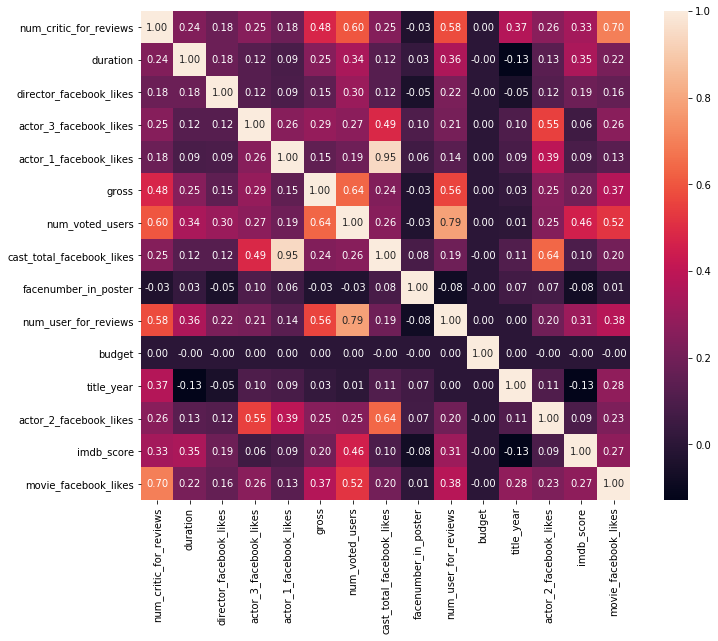

In [9]:
plt.figure(figsize=(12,9))
sns.heatmap(cor, cbar=True, annot=True, square=True, fmt='.2f',
        xticklabels=cor.columns,
        yticklabels=cor.columns)


## 将毫无关系的变量去掉

In [13]:
df_norm2.columns

Index(['num_critic_for_reviews', 'duration', 'director_facebook_likes',
       'actor_3_facebook_likes', 'actor_1_facebook_likes', 'gross',
       'num_voted_users', 'cast_total_facebook_likes', 'facenumber_in_poster',
       'num_user_for_reviews', 'budget', 'actor_2_facebook_likes',
       'imdb_score', 'movie_facebook_likes'],
      dtype='object')

In [16]:
df_norm2 = df_norm2.drop(['budget','cast_total_facebook_likes'],axis=1)

# 将归一化的数据和one-hot整合起来

In [150]:
df_norm2.shape

(4119, 15)

In [151]:
df_norm2['index'] = range(4119)

In [152]:
one_hot.shape

(4119, 104)

In [153]:
one_hot['index'] = range(4119)

In [154]:
data = pd.merge(df_norm2,one_hot,how='outer',on='index')

In [22]:
data.shape

(4119, 116)

In [173]:
data.head()

,year,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,...,content_rating_M,content_rating_NC-17,content_rating_Not Rated,content_rating_Other,content_rating_PG,content_rating_PG-13,content_rating_Passed,content_rating_R,content_rating_Unrated,content_rating_X
0,2009,4.604431,3.053508,-0.253704,0.077694,-0.419939,1.749417,5.372856,-0.325549,-0.670609,...,0,0,0,0,0,1,0,0,0,0
1,2007,1.167316,2.652245,-0.063138,0.158941,2.165408,1.362472,2.546492,2.025142,-0.670609,...,0,0,0,0,0,1,0,0,0,0
2,2015,3.616566,1.715966,-0.253704,-0.311172,0.242970,1.174898,1.215992,0.045345,-0.180329,...,0,0,0,0,0,1,0,0,0,0
3,2012,5.339206,2.429322,7.192932,12.486113,1.303625,1.521855,7.130943,5.180339,-0.670609,...,0,0,0,0,0,1,0,0,0,0
4,2012,2.473583,1.002610,-0.092925,-0.104412,-0.443804,0.741447,0.782391,-0.485500,-0.180329,...,0,0,0,0,0,1,0,0,0,0


In [ ]:
data['gross'] = data['gross'].apply(lambda x:log1p(x))

# 建模

In [44]:
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.model_selection import GridSearchCV as cv

In [156]:
data.head()

,year,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,...,content_rating_M,content_rating_NC-17,content_rating_Not Rated,content_rating_Other,content_rating_PG,content_rating_PG-13,content_rating_Passed,content_rating_R,content_rating_Unrated,content_rating_X
0,2009,4.604431,3.053508,-0.253704,0.077694,-0.419939,1.749417,5.372856,-0.325549,-0.670609,...,0,0,0,0,0,1,0,0,0,0
1,2007,1.167316,2.652245,-0.063138,0.158941,2.165408,1.362472,2.546492,2.025142,-0.670609,...,0,0,0,0,0,1,0,0,0,0
2,2015,3.616566,1.715966,-0.253704,-0.311172,0.242970,1.174898,1.215992,0.045345,-0.180329,...,0,0,0,0,0,1,0,0,0,0
3,2012,5.339206,2.429322,7.192932,12.486113,1.303625,1.521855,7.130943,5.180339,-0.670609,...,0,0,0,0,0,1,0,0,0,0
4,2012,2.473583,1.002610,-0.092925,-0.104412,-0.443804,0.741447,0.782391,-0.485500,-0.180329,...,0,0,0,0,0,1,0,0,0,0


In [178]:
x = data.drop(['gross','index'],axis=1)
y = data['gross']

## 训练集和测试集分离

In [180]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=10)

In [181]:
x_train.shape,x_test.shape

((3295, 117), (824, 117))

In [182]:
y_train.shape,y_test.shape

((3295,), (824,))

## 决策树建立

## 回归决策树

In [183]:
model = tree.DecisionTreeRegressor()

In [184]:
model.fit(x_train,y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [185]:
model.score(x_train,y_train)  # R-2score，训练集上的准确率

0.9999999995235637

In [186]:
model.score(x_test,y_test)  # 测试集的准确率，过拟合了

0.2632227078245296

In [187]:
model.get_params()

{'criterion': 'mse',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'presort': False,
 'random_state': None,
 'splitter': 'best'}

In [188]:
model.feature_importances_

array([5.48134045e-02, 3.15336003e-02, 2.89285976e-02, 2.51993747e-02,
       1.69429830e-02, 2.27051643e-02, 4.96728511e-01, 1.47457265e-02,
       1.38913688e-02, 5.91410320e-02, 0.00000000e+00, 2.04097352e-02,
       4.24816160e-02, 2.67653702e-02, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 2.61839433e-04, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 6.44850722e-03, 0.00000000e+00, 1.78570482e-06,
       4.63666841e-10, 0.00000000e+00, 3.71103429e-08, 5.09990415e-05,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 7.71465812e-07,
       0.00000000e+00, 0.00000000e+00, 1.53521026e-06, 4.20622152e-08,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 6.42809380e-04,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 4.88487702e-05, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
      

## 分类决策树

In [199]:
y_cut = pd.qcut(y,10,retbins=True)

In [207]:
y_cut[0].value_counts()

(0.973, 1.749]                   412
(0.756, 0.973]                   412
(0.594, 0.756]                   412
(0.443, 0.594]                   412
(0.0827, 0.288]                  412
(-0.204, 0.0827]                 412
(-0.628, -0.204]                 412
(-1.518, -0.628]                 412
(-4.8580000000000005, -1.518]    412
(0.288, 0.443]                   411
Name: gross, dtype: int64

In [194]:
x_train_cut,x_test_cut,y_train_cut,y_test_cut = train_test_split(x,y_cut,test_size=0.2,random_state=10)

In [195]:
model_class = tree.DecisionTreeClassifier()
model_class.fit(x_train_cut,y_train_cut)
model.score(x_train_cut,y_train_cut)
model.score(x_test_cut,y_test_cut)

ValueError: Unknown label type: 'unknown'

## 网格搜索最佳参数

In [84]:
param_grid= {'max_depth':[1000,500,200,100,50,20],
             'min_samples_leaf':[0.001,0.1,0.5,1],
            'min_weight_fraction_leaf':[0,1e-3,1e-2],
            'max_leaf_nodes':[10,20,50,100,200],
            'max_features':['log2',10,20,30]}

In [85]:
clf = cv(model,param_grid=param_grid, cv=4)

In [86]:
clf.fit(x_train,y_train)

GridSearchCV(cv=4, error_score='raise',
       estimator=DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_depth': [1000, 500, 200, 100, 50, 20], 'min_samples_leaf': [0.001, 0.1, 0.5, 1], 'criterion': ['mse', 'mae'], 'min_weight_fraction_leaf': [0, 0.001, 0.01], 'max_leaf_nodes': [10, 20, 50, 100, 200], 'max_features': ['log2', 'sqrt', 10, 20, 30]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [88]:
clf.best_score_

0.5824642860581456

In [89]:
clf.best_params_

{'criterion': 'mse',
 'max_depth': 100,
 'max_features': 30,
 'max_leaf_nodes': 100,
 'min_samples_leaf': 1,
 'min_weight_fraction_leaf': 0.01}

In [91]:
clf.grid_scores_

[mean: 0.22277, std: 0.11576, params: {'criterion': 'mse', 'max_depth': 1000, 'max_features': 'log2', 'max_leaf_nodes': 10, 'min_samples_leaf': 0.001, 'min_weight_fraction_leaf': 0},
 mean: 0.19142, std: 0.08771, params: {'criterion': 'mse', 'max_depth': 1000, 'max_features': 'log2', 'max_leaf_nodes': 10, 'min_samples_leaf': 0.001, 'min_weight_fraction_leaf': 0.001},
 mean: 0.28226, std: 0.08701, params: {'criterion': 'mse', 'max_depth': 1000, 'max_features': 'log2', 'max_leaf_nodes': 10, 'min_samples_leaf': 0.001, 'min_weight_fraction_leaf': 0.01},
 mean: 0.06610, std: 0.05757, params: {'criterion': 'mse', 'max_depth': 1000, 'max_features': 'log2', 'max_leaf_nodes': 10, 'min_samples_leaf': 0.1, 'min_weight_fraction_leaf': 0},
 mean: 0.05594, std: 0.09693, params: {'criterion': 'mse', 'max_depth': 1000, 'max_features': 'log2', 'max_leaf_nodes': 10, 'min_samples_leaf': 0.1, 'min_weight_fraction_leaf': 0.001},
 mean: 0.13104, std: 0.07946, params: {'criterion': 'mse', 'max_depth': 1000, 

In [52]:
clf.best_estimator_

DecisionTreeRegressor(criterion='mse', max_depth=100, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=0.1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [53]:
clf.score(x_train,y_train)

0.43561037439544736

In [54]:
clf.score(x_test,y_test)

0.4113127723795533